The CTR Dataset

Download from here: [link](https://drive.google.com/file/d/1YCLL0Rtc7i4PgpsjQEjgWBdF_T2yEkFi/view)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
import pytz


In [12]:
file_name = '../data/train_dataset_full.csv'  
df = pd.read_csv(file_name)

print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389163 entries, 0 to 389162
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              384997 non-null  float64
 1   DateTime                385054 non-null  object 
 2   user_id                 385055 non-null  float64
 3   product                 384989 non-null  object 
 4   campaign_id             384975 non-null  float64
 5   webpage_id              385006 non-null  float64
 6   product_category_1      384962 non-null  float64
 7   product_category_2      80928 non-null   float64
 8   user_group_id           369844 non-null  float64
 9   gender                  369839 non-null  object 
 10  age_level               369854 non-null  float64
 11  user_depth              369841 non-null  float64
 12  city_development_index  281026 non-null  float64
 13  var_1                   385002 non-null  float64
 14  is_cli

In [13]:
print("Dataset Top 5 rows:")
df.head()

Dataset Top 5 rows:


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,98528.0,2017-07-04 16:42,7716.0,C,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,NaN,1.0,1.0
1,589714.0,2017-07-07 07:40,1035283.0,I,118601.0,28529.0,4.0,82527.0,10.0,Female,4.0,3.0,3.0,1.0,0.0
2,478652.0,2017-07-07 20:42,65994.0,H,359520.0,13787.0,4.0,NaN,4.0,Male,4.0,3.0,2.0,0.0,0.0
3,34536.0,2017-07-05 15:05,75976.0,H,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,3.0,0.0,0.0
4,71863.0,2017-07-06 20:11,987498.0,C,405490.0,60305.0,3.0,NaN,2.0,Male,2.0,3.0,2.0,0.0,0.0


In [14]:
df.describe(include='all').T.sort_index()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DateTime,385054,8588,2017-07-04 20:39,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_level,369854.0,NaN,NaN,NaN,2.78279,1.070502,0.0,2.0,3.0,3.0,6.0
campaign_id,384975.0,NaN,NaN,NaN,308535.060783,126514.409671,82320.0,118601.0,359520.0,405490.0,414149.0
city_development_index,281026.0,NaN,NaN,NaN,2.557432,0.921094,1.0,2.0,2.0,3.0,4.0
gender,369839,2,Male,326805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_click,385031.0,NaN,NaN,NaN,0.067576,0.251018,0.0,0.0,0.0,0.0,1.0
product,384989,10,C,136047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_1,384962.0,NaN,NaN,NaN,3.071529,1.304761,1.0,2.0,3.0,4.0,5.0
product_category_2,80928.0,NaN,NaN,NaN,162826.298216,78709.449802,18595.0,82527.0,146115.0,254132.0,450184.0
session_id,384997.0,NaN,NaN,NaN,285447.974478,168613.52914,2.0,137570.0,285447.0,435460.0,595812.0


In [15]:
missing_values = df.isnull().sum()
print(missing_values)

session_id                  4166
DateTime                    4109
user_id                     4108
product                     4174
campaign_id                 4188
webpage_id                  4157
product_category_1          4201
product_category_2        308235
user_group_id              19319
gender                     19324
age_level                  19309
user_depth                 19322
city_development_index    108137
var_1                       4161
is_click                    4132
dtype: int64


In [16]:
# Check for duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Display duplicate rows (optional)
if duplicates.sum() > 0:
    print(df[duplicates])

Number of duplicate rows: 19510
        session_id          DateTime   user_id product  campaign_id  \
1355           NaN               NaN       NaN     NaN          NaN   
1369           NaN               NaN       NaN     NaN          NaN   
2343           NaN               NaN       NaN     NaN          NaN   
2407           NaN               NaN       NaN     NaN          NaN   
2823           NaN               NaN       NaN     NaN          NaN   
...            ...               ...       ...     ...          ...   
389158    464382.0  2017-07-02 08:03  927351.0       I     359520.0   
389159    446419.0  2017-07-04 21:14  698480.0       H     360936.0   
389160    218568.0  2017-07-06 23:30  165101.0       I     118601.0   
389161    258090.0  2017-07-02 16:35    2179.0       I     396664.0   
389162    346235.0  2017-07-03 20:57  744441.0       H     414149.0   

        webpage_id  product_category_1  product_category_2  user_group_id  \
1355           NaN                 NaN

In [17]:
# Drop duplicates
df = df.drop_duplicates()

# Create a copy before dropping columns and missing values
df_copy2 = df.copy()

# Columns to drop due to high missing values
columns_to_drop = ['product_category_2', 'city_development_index']
df_cleaned2 = df_copy2.drop(columns=columns_to_drop)

# Identify rows with missing values
rows_with_missing = df_cleaned2[df_cleaned2.isnull().any(axis=1)]

# Drop missing values
df_cleaned2 = df_cleaned2.dropna()

# Arrange dropped rows into a new dataframe
df_missing = pd.concat([df_copy2, df_cleaned2]).drop_duplicates(keep=False)

# Verify the counts

print(f"Total rows in the missing dataset: {len(df_missing)}")

print("Sample of dropped rows:")
print(df_missing.head())

Total rows in the missing dataset: 583751
Sample of dropped rows:
   session_id          DateTime    user_id product  campaign_id  webpage_id  \
1    589714.0  2017-07-07 07:40  1035283.0       I     118601.0     28529.0   
2    478652.0  2017-07-07 20:42    65994.0       H     359520.0     13787.0   
3     34536.0  2017-07-05 15:05    75976.0       H     405490.0     60305.0   
4     71863.0  2017-07-06 20:11   987498.0       C     405490.0     60305.0   
5    255052.0  2017-07-04 21:40   519554.0       I     396664.0     51181.0   

   product_category_1  product_category_2  user_group_id  gender  age_level  \
1                 4.0             82527.0           10.0  Female        4.0   
2                 4.0                 NaN            4.0    Male        4.0   
3                 3.0                 NaN            3.0    Male        3.0   
4                 3.0                 NaN            2.0    Male        2.0   
5                 1.0                 NaN            NaN     NaN

In [18]:
# Count rows in df_missing where is_click is 1
clicks_in_missing = df_missing[df_missing['is_click'] == 1].shape[0]

# Print the count
print(f"Number of rows with is_click=1 in df_missing: {clicks_in_missing}")


Number of rows with is_click=1 in df_missing: 39371


In [19]:
# Drop all duplicate rows
df = df.drop_duplicates()

# Verify if duplicates are removed
print("Duplicates after removal:", df.duplicated().sum())

# without imputation we are going to loose 5.83% of data (it's legit and can skip the imputation)

df_copy = df.copy()
columns_to_drop = ['product_category_2', 'city_development_index'] # due to high missings
df_cleaned = df_copy.drop(columns=columns_to_drop)
df_cleaned = df_cleaned.dropna()

initial_counts = len(df)  # Total rows in the original dataset
cleaned_count = len(df_cleaned)

loss_percentage2 = ((initial_counts - cleaned_count) / initial_counts) * 100

print(f"Total rows in the original dataset: {initial_counts}")
print(f"Total rows in the cleaned dataset: {cleaned_count}")
print(f"Percentage of rows lost during cleaning: {loss_percentage2:.2f}%")

lost_values_percentage = ((df.count() - df_cleaned.count()) / df.count()) * 100

# Display the results
print("Lost values percentage:")
print(lost_values_percentage)


Duplicates after removal: 0
Total rows in the original dataset: 369653
Total rows in the cleaned dataset: 349024
Percentage of rows lost during cleaning: 5.58%
Lost values percentage:
DateTime                  4.826259
age_level                 0.913858
campaign_id               4.793807
city_development_index         NaN
gender                    0.898665
is_click                  4.803155
product                   4.801597
product_category_1        4.795884
product_category_2             NaN
session_id                4.815357
user_depth                0.901198
user_group_id             0.910201
user_id                   4.827037
var_1                     4.799260
webpage_id                4.803155
dtype: float64


In [20]:
# Calculate average CTR in df_missing
average_ctr_missing = df_missing['is_click'].mean()
print(f"Average CTR in df_missing: {average_ctr_missing:.4f}")

# Calculate average CTR in df_cleaned
average_ctr_cleaned = df_cleaned['is_click'].mean()
print(f"Average CTR in df_cleaned: {average_ctr_cleaned:.4f}")

Average CTR in df_missing: 0.0678
Average CTR in df_cleaned: 0.0677


In [21]:
# add clicks metrics

sessions_per_user = df_cleaned.groupby('user_id')['session_id'].nunique().reset_index()
sessions_per_user.rename(columns={'session_id': 'sessions_per_user'}, inplace=True)
df_cleaned = df_cleaned.merge(sessions_per_user, on='user_id', how='left')

df_cleaned.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,var_1,is_click,sessions_per_user
0,98528.0,2017-07-04 16:42,7716.0,C,405490.0,60305.0,3.0,3.0,Male,3.0,3.0,1.0,1.0,2
1,589714.0,2017-07-07 07:40,1035283.0,I,118601.0,28529.0,4.0,10.0,Female,4.0,3.0,1.0,0.0,3
2,478652.0,2017-07-07 20:42,65994.0,H,359520.0,13787.0,4.0,4.0,Male,4.0,3.0,0.0,0.0,15
3,34536.0,2017-07-05 15:05,75976.0,H,405490.0,60305.0,3.0,3.0,Male,3.0,3.0,0.0,0.0,3
4,71863.0,2017-07-06 20:11,987498.0,C,405490.0,60305.0,3.0,2.0,Male,2.0,3.0,0.0,0.0,3


In [36]:
# Encode categorical values using one-hot encoding (dummies)
categorical_columns = ['product', 'campaign_id', 'webpage_id', 'product_category_1', 'user_group_id', 'gender', 'var_1']

# Create dummies for these columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


,session_id,DateTime,user_id,age_level,user_depth,is_click,sessions_per_user,product_B,product_C,product_D,...,user_group_id_5.0,user_group_id_6.0,user_group_id_7.0,user_group_id_8.0,user_group_id_9.0,user_group_id_10.0,user_group_id_11.0,user_group_id_12.0,gender_Male,var_1_1.0
0,98528.0,2017-07-04 16:42,7716.0,3.0,3.0,1.0,2,False,True,False,...,False,False,False,False,False,False,False,False,True,True
1,589714.0,2017-07-07 07:40,1035283.0,4.0,3.0,0.0,3,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,478652.0,2017-07-07 20:42,65994.0,4.0,3.0,0.0,15,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,34536.0,2017-07-05 15:05,75976.0,3.0,3.0,0.0,3,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,71863.0,2017-07-06 20:11,987498.0,2.0,3.0,0.0,3,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [40]:
# let's create datetime variable
df_encoded['DateTime'] = pd.to_datetime(df_encoded['DateTime'], errors='coerce')

# Sort the dataframe by DateTime to ensure chronological order
df_encoded.sort_values(by='DateTime', inplace=True)

# Lets inpute DateTime:
# df_encoded['DateTime'] = df_encoded['DateTime'].ffill() # Forward fill
# df_encoded['DateTime'] = df_encoded['DateTime'].bfill() # Backward fill

# Check again for missing values - exp. 0
print(df_encoded['DateTime'].isnull().sum())

print(df_encoded['DateTime'].min(), df_encoded['DateTime'].max())

0
2017-07-02 00:00:00 2017-07-07 23:59:00


In [24]:
# add new datetime variables
df_encoded['hour'] = df_encoded['DateTime'].dt.hour
df_encoded['day_of_week'] = df_encoded['DateTime'].dt.dayofweek # Monday=0, Tuesday=1, Wednesday=3, Thirsday=4, Friday=5, Saturday = 6

# Duplicate the DateTime column
df_encoded['DateTime_Column'] = df_encoded['DateTime']

# Set DateTime as the index
df_encoded.set_index('DateTime', inplace=True)  # Set original column as index

# Sort the data by DateTime
df_encoded.sort_index(inplace=True)

df_encoded.head(10)

,session_id,user_id,age_level,user_depth,is_click,sessions_per_user,product_B,product_C,product_D,product_E,...,user_group_id_8.0,user_group_id_9.0,user_group_id_10.0,user_group_id_11.0,user_group_id_12.0,gender_Male,var_1_1.0,hour,day_of_week,DateTime_Column
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-07-02 00:00:00,140690.0,858557.0,4.0,3.0,0.0,2,False,True,False,False,...,False,False,True,False,False,False,False,0,6,2017-07-02 00:00:00
2017-07-02 00:00:00,129781.0,243253.0,2.0,2.0,0.0,3,False,True,False,False,...,True,False,False,False,False,False,False,0,6,2017-07-02 00:00:00
2017-07-02 00:00:00,464848.0,1097446.0,3.0,3.0,0.0,13,False,False,False,False,...,False,False,False,False,False,True,True,0,6,2017-07-02 00:00:00
2017-07-02 00:00:00,333291.0,243253.0,2.0,2.0,0.0,3,False,True,False,False,...,True,False,False,False,False,False,False,0,6,2017-07-02 00:00:00
2017-07-02 00:01:00,461128.0,469098.0,4.0,3.0,0.0,1,False,True,False,False,...,False,False,False,False,False,True,False,0,6,2017-07-02 00:01:00
2017-07-02 00:01:00,151475.0,509591.0,1.0,3.0,0.0,1,False,False,False,False,...,False,False,False,False,False,True,False,0,6,2017-07-02 00:01:00
2017-07-02 00:01:00,90569.0,663656.0,2.0,3.0,0.0,8,False,True,False,False,...,False,False,False,False,False,True,True,0,6,2017-07-02 00:01:00
2017-07-02 00:02:00,428267.0,312475.0,2.0,3.0,0.0,13,False,False,False,False,...,False,False,False,False,False,True,True,0,6,2017-07-02 00:02:00
2017-07-02 00:02:00,353607.0,418107.0,4.0,3.0,0.0,1,True,False,False,False,...,False,False,False,False,False,True,False,0,6,2017-07-02 00:02:00


In [25]:
print("Cleanded Dataset Info:")
print(df_encoded.info())
print("Summary Statistics:")
df_encoded.describe(include='all').T.sort_index()
# top: mode value in the column
# freq: count of the mode value (top)


Cleanded Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 349024 entries, 2017-07-02 00:00:00 to 2017-07-07 23:59:00
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   session_id              349024 non-null  float64       
 1   user_id                 349024 non-null  float64       
 2   age_level               349024 non-null  float64       
 3   user_depth              349024 non-null  float64       
 4   is_click                349024 non-null  float64       
 5   sessions_per_user       349024 non-null  int64         
 6   product_B               349024 non-null  bool          
 7   product_C               349024 non-null  bool          
 8   product_D               349024 non-null  bool          
 9   product_E               349024 non-null  bool          
 10  product_F               349024 non-null  bool          
 11  product_G               349024 non

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
DateTime_Column,349024,NaN,NaN,NaN,2017-07-05 00:41:15.885670144,2017-07-02 00:00:00,2017-07-03 12:07:00,2017-07-04 22:17:00,2017-07-06 12:42:00,2017-07-07 23:59:00,NaN
age_level,349024.0,NaN,NaN,NaN,2.782903,0.0,2.0,3.0,3.0,6.0,1.070345
campaign_id_105960.0,349024,2,False,329543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_id_118601.0,349024,2,False,321773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_id_359520.0,349024,2,False,267108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_id_360936.0,349024,2,False,309729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_id_396664.0,349024,2,False,330837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_id_404347.0,349024,2,False,327528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_id_405490.0,349024,2,False,276677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_id_414149.0,349024,2,False,326991,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Value Counts for Target Variable (is_click):
is_click
0.0    325405
1.0     23619
Name: count, dtype: int64


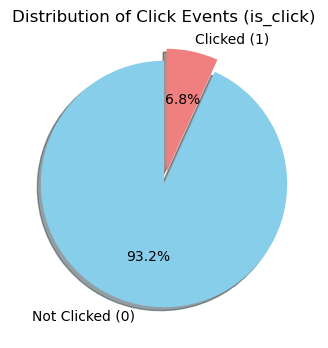

In [26]:
# Variable 'is_click'
print("\nValue Counts for Target Variable (is_click):")
is_click_counts = df_encoded['is_click'].value_counts()
print(is_click_counts)

plt.figure(figsize=(4, 4))
is_click_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Not Clicked (0)', 'Clicked (1)'],
    colors=['skyblue', 'lightcoral'],
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
plt.title("Distribution of Click Events (is_click)")
plt.ylabel("")
plt.show()

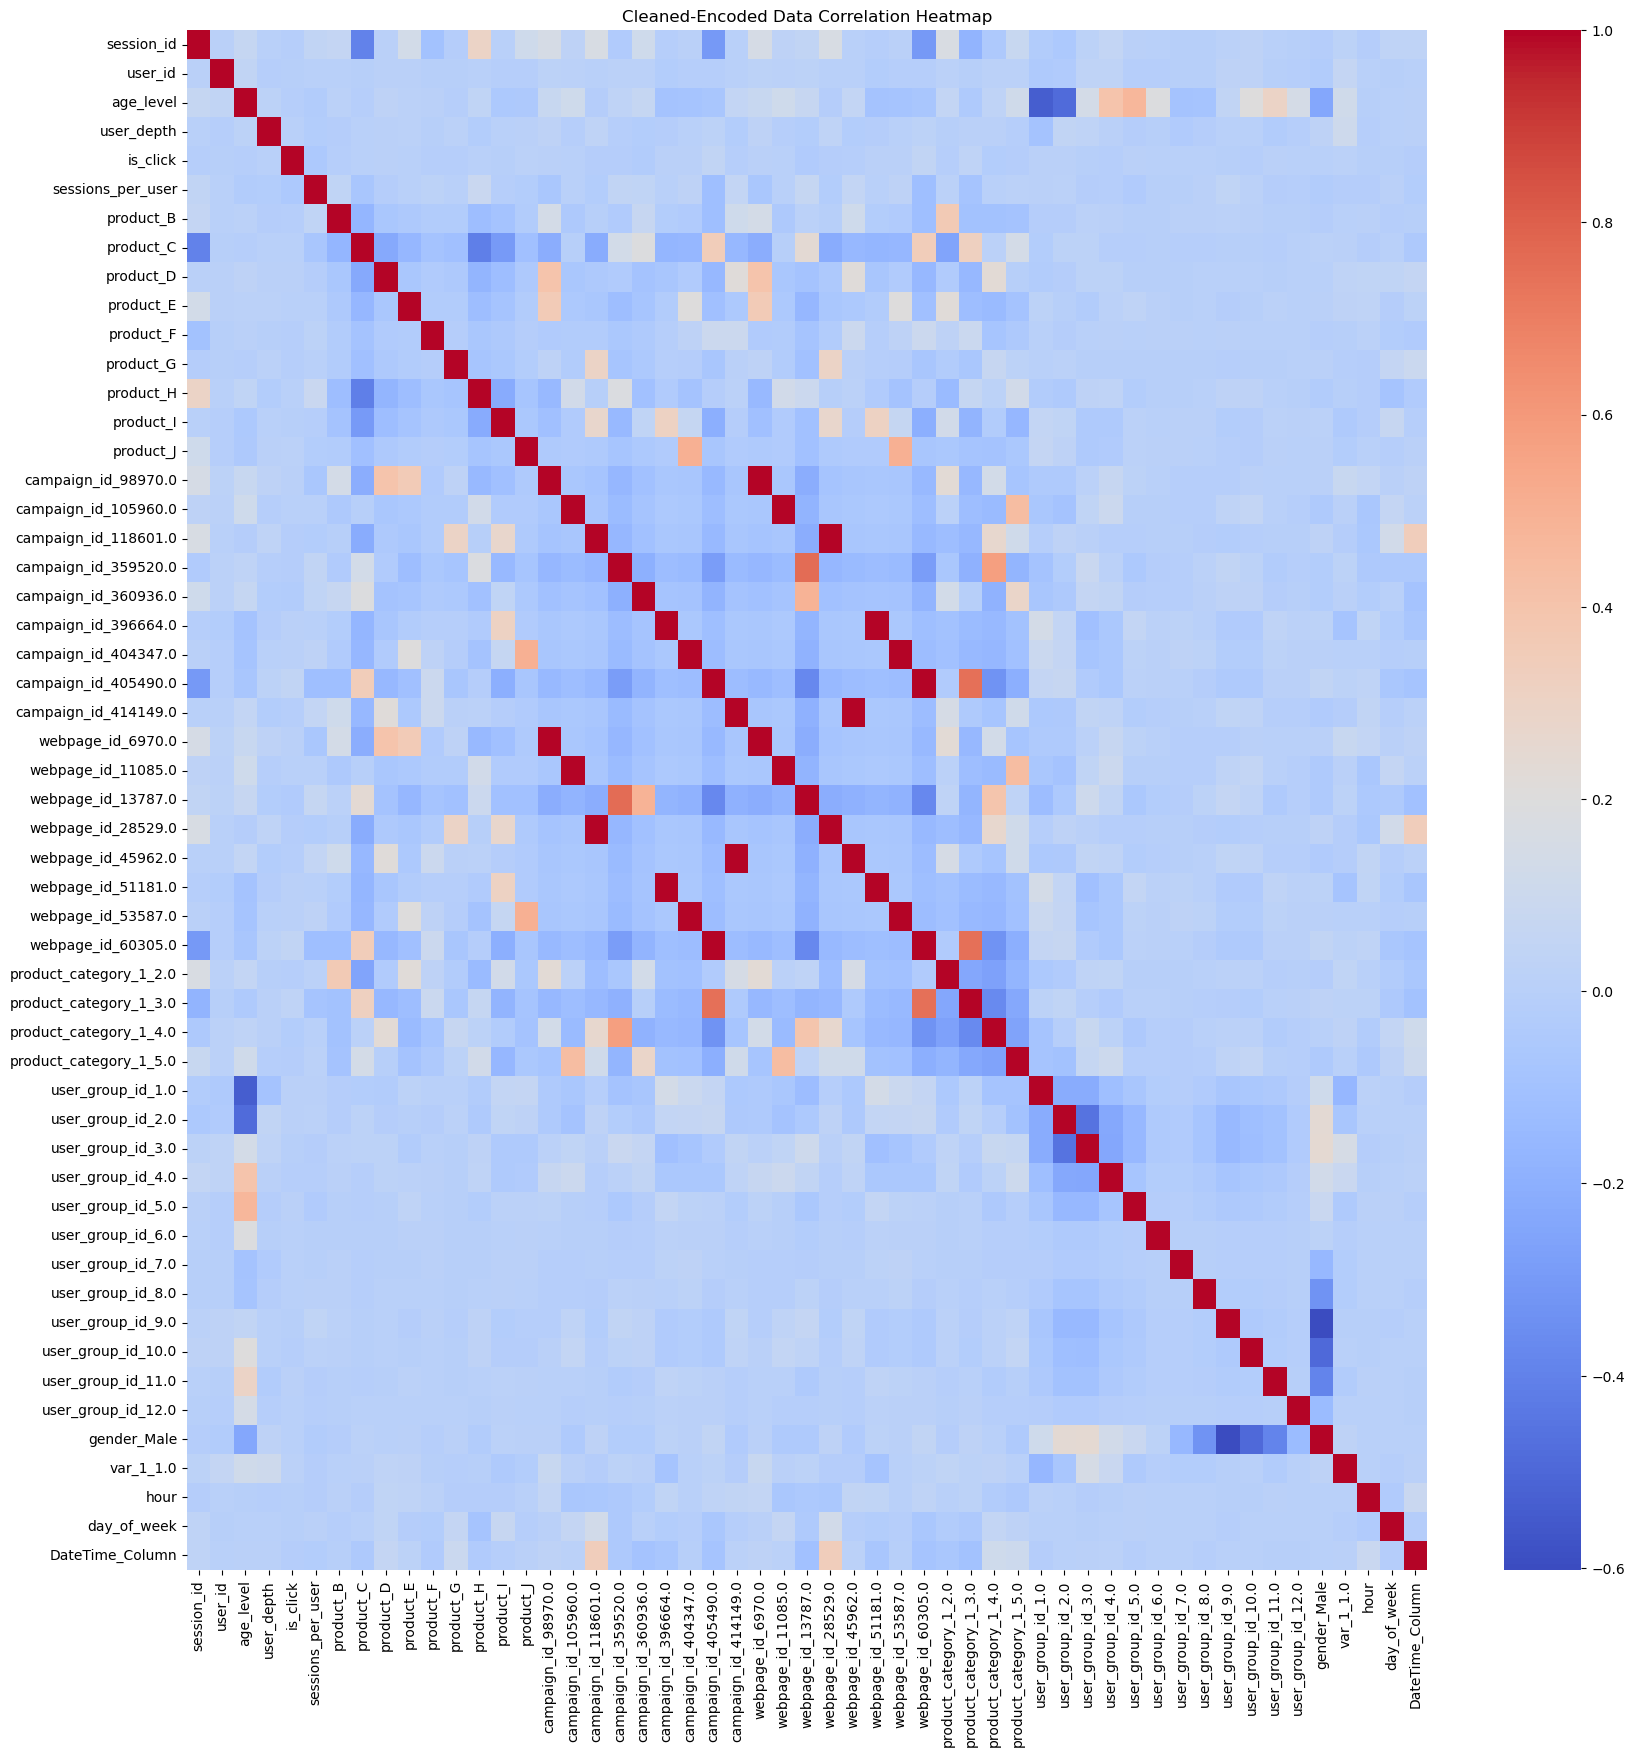

In [27]:
# correlations 
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True)
plt.title('Cleaned-Encoded Data Correlation Heatmap')
plt.show()

In [28]:
# Check time zone of DateTime
print(df_encoded['DateTime_Column'].dt.tz) #None
df_encoded['DateTime_UTC'] = df_encoded['DateTime_Column'].dt.tz_localize('UTC')
print(df_encoded['DateTime_UTC'].dt.tz)


None
UTC


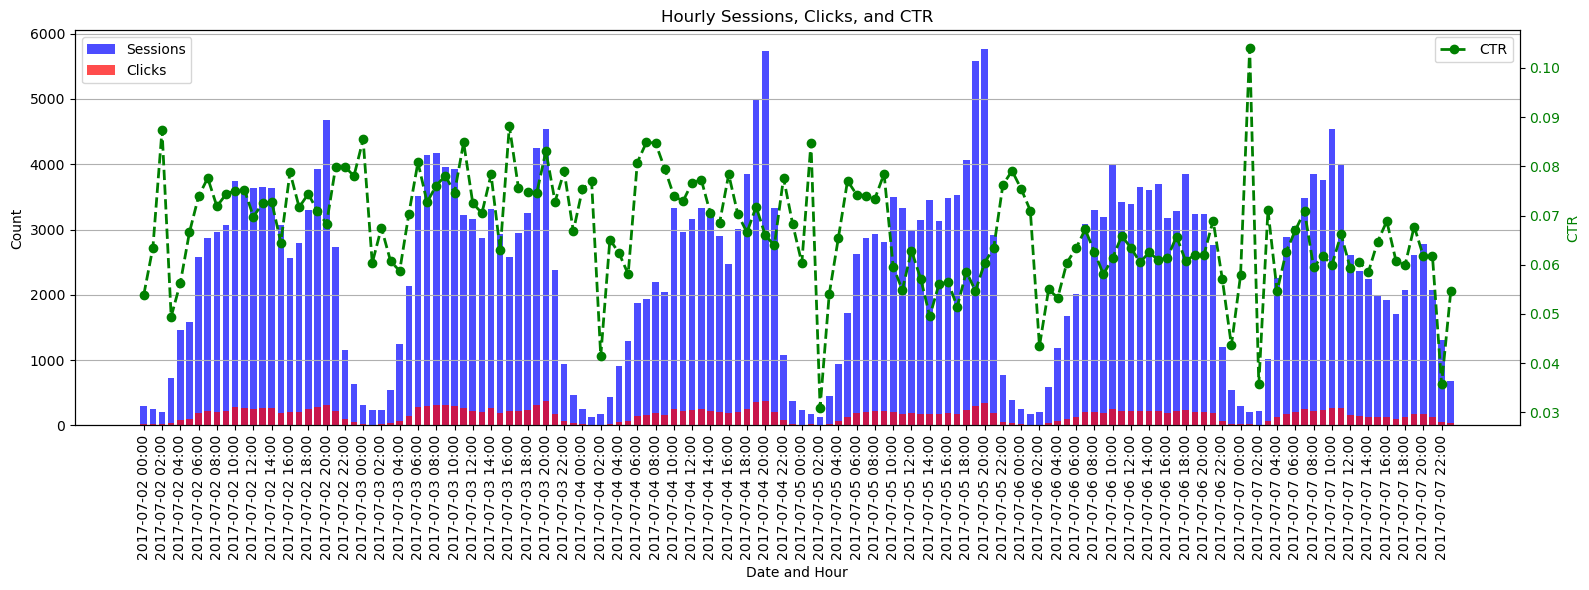

'\nDaytime Activity: Most user interactions, including sessions and clicks, occur during the day, suggesting higher engagement during working hours or leisure time.\nCTR Variability: CTR spikes during certain off-peak hours could suggest effective advertising strategies or targeted campaigns.\nTemporal Trends: Understanding these temporal patterns can help optimize campaign scheduling to align with user engagement peaks for better performance.\n'

In [29]:
# Aggregate data by hourly intervals using 'DateTime'
hourly_data = df_encoded.set_index('DateTime_UTC').groupby(pd.Grouper(freq='h')).agg(
    total_sessions=('session_id', 'count'),  # Count of sessions
    total_clicks=('is_click', 'sum')        # Sum of clicks
).reset_index()

hourly_data['ctr'] = hourly_data['total_clicks'] / hourly_data['total_sessions']

# Plot sessions and clicks as bar charts
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar chart for total sessions and clicks
ax1.bar(hourly_data['DateTime_UTC'], hourly_data['total_sessions'], label='Sessions', alpha=0.7, color='blue', width=0.03)
ax1.bar(hourly_data['DateTime_UTC'], hourly_data['total_clicks'], label='Clicks', alpha=0.7, color='red', width=0.03)

# Configure primary y-axis (for sessions and clicks)
ax1.set_xlabel('Date and Hour')
ax1.set_ylabel('Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.set_xticks(hourly_data['DateTime_UTC'][::2])  # Reduce x-tick density for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Add hours to x-axis labels
ax1.tick_params(axis='x', rotation=90)
ax1.grid(axis='y')

# Add CTR to a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(hourly_data['DateTime_UTC'], hourly_data['ctr'], label='CTR', color='green', linestyle='--', marker='o', linewidth=2)
ax2.set_ylabel('CTR', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Title and layout
plt.title('Hourly Sessions, Clicks, and CTR')
plt.tight_layout()
plt.show()

'''
Daytime Activity: Most user interactions, including sessions and clicks, occur during the day, suggesting higher engagement during working hours or leisure time.
CTR Variability: CTR spikes during certain off-peak hours could suggest effective advertising strategies or targeted campaigns.
Temporal Trends: Understanding these temporal patterns can help optimize campaign scheduling to align with user engagement peaks for better performance.
'''

In [30]:
# Verify index type and values
print("Index dtype:", df_encoded.index.dtype)
print(df_encoded.index[:5])  # Display the first 5 index values


Index dtype: datetime64[ns]
DatetimeIndex(['2017-07-02 00:00:00', '2017-07-02 00:00:00',
               '2017-07-02 00:00:00', '2017-07-02 00:00:00',
               '2017-07-02 00:01:00'],
              dtype='datetime64[ns]', name='DateTime', freq=None)


In [31]:
from sklearn.model_selection import train_test_split

# Define features and target column
X = df_encoded.drop(columns=['is_click'])  # Features
y = df_encoded['is_click']                # Target

# Perform stratified split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Combine X and y back into DataFrames for train and test
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Verify the stratified split
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")
print(f"Train target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")

# Save to CSV (optional)
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

Train size: 279219
Test size: 69805
Train target distribution:
is_click
0.0    0.932329
1.0    0.067671
Name: proportion, dtype: float64
Test target distribution:
is_click
0.0    0.932326
1.0    0.067674
Name: proportion, dtype: float64


In [32]:
# Combine X and y back into DataFrames
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Save train and test sets to CSV files
train.to_csv('train.csv', index=False)  # Save train set to 'train.csv'
test.to_csv('test.csv', index=False)    # Save test set to 'test.csv'
    